<a href="https://colab.research.google.com/github/AnchitSharma/tensorflow-for-deep-learning-with-python/blob/master/tensorflow_basics_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd

In [33]:
diabetes = pd.read_csv("https://raw.githubusercontent.com/AnchitSharma/tensorflow-for-deep-learning-with-python/master/pima-indians-diabetes.csv")

In [34]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [35]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [36]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps', 'Insulin', 'BMI', 'Pedigree']

In [37]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x : (x - x.min())/(x.max() - x.min()))

In [38]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


Features Columnns

In [39]:
%tensorflow_version 1.x
import tensorflow as tf

In [40]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [41]:
num_preg = tf.feature_column.numeric_column("Number_pregnant")
plasma_gluc = tf.feature_column.numeric_column("Glucose_concentration")
dias_press = tf.feature_column.numeric_column("Blood_pressure")
tricep = tf.feature_column.numeric_column("Triceps")
insulin = tf.feature_column.numeric_column("Insulin")
bmi = tf.feature_column.numeric_column("BMI")
diabetes_pedigree = tf.feature_column.numeric_column("Pedigree")
age = tf.feature_column.numeric_column("Age")

Categorical Features

In [42]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list("Group", ["A", "B", "C", "D"])

Converting continous to categorical

In [43]:
import matplotlib.pyplot as plt

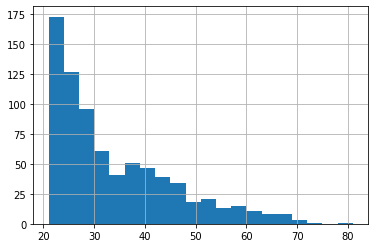

In [44]:
diabetes['Age'].hist(bins=20)

In [45]:
age_buckets = tf.feature_column.bucketized_column(age, boundaries=[20, 30, 40, 50, 60, 70, 80])

Putting them together

In [46]:
feat_cols = [num_preg, plasma_gluc, dias_press, tricep, insulin, bmi, diabetes_pedigree, assigned_group,age_buckets]

Train Test split

In [47]:
x_data = diabetes.drop("Class", axis=1)

In [48]:
label = diabetes['Class']

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(x_data, label, test_size=0.3, random_state=101)

In [30]:
X_train.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
711,0.294118,0.633166,0.639344,0.272727,0.026005,0.441133,0.154142,40,D
58,0.000000,0.733668,0.672131,0.000000,0.000000,0.603577,0.727156,44,D
216,0.294118,0.547739,0.508197,0.414141,0.152482,0.533532,0.186166,25,B
168,0.235294,0.552764,0.540984,0.000000,0.000000,0.475410,0.167805,29,B
658,0.647059,0.638191,0.868852,0.000000,0.000000,0.581222,0.047822,51,A


In [51]:
y_train.head()

711    0
58     0
216    1
168    0
658    0
Name: Class, dtype: int64

Input Function

In [52]:
input_func = tf.estimator.inputs.pandas_input_fn(x = X_train, y=y_train, batch_size=10, num_epochs=1000, shuffle=True)

In [53]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp6v422_fs', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fa52c29fc88>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [54]:
model.train(input_fn= input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use `tf.cast` instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp6v422_fs/model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 232.428
INFO:tensorflow:loss = 7.0254445, step = 101 (0.442 sec)
INFO:tensorflow:global_step/sec: 129.905
INFO:tensorflow:loss = 5.5999002, step = 201 (0.767 sec)
INFO:tensorflow:global_step/sec: 335.906
INFO:tensorflow:loss = 5.9429555, step = 301 (0.293 sec)
INFO:tensorflow:global_step/sec: 323.328
INFO:tensorflow:loss = 4.859886, step = 401 (0.315 sec)
INFO:tensorflow:global_step/sec: 278.489
INFO:tensorflow:loss = 4.32935, step = 501 (0.353 sec)
INFO:tensorflow:global_ste

Evaluation

In [55]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, y=y_test, batch_size=10, num_epochs=1, shuffle=False)

In [56]:
results = model.evaluate(input_fn=eval_input_func)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-08-31T13:01:20Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp6v422_fs/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-08-31-13:01:21
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.74458873, accuracy_baseline = 0.64935064, auc = 0.7979835, auc_precision_recall = 0.63614726, average_loss = 0.5311283, global_step = 1000, label/mean = 0.35064936, loss = 5.1121097, precision = 0.6617647, prediction/mean = 0.37297085, recall = 0.5555556
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmp6v422_fs/model.ckpt-1000


In [57]:
results

{'accuracy': 0.74458873,
 'accuracy_baseline': 0.64935064,
 'auc': 0.7979835,
 'auc_precision_recall': 0.63614726,
 'average_loss': 0.5311283,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 5.1121097,
 'precision': 0.6617647,
 'prediction/mean': 0.37297085,
 'recall': 0.5555556}

Predictions

In [58]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, batch_size=10, num_epochs=1, shuffle=False)

In [59]:
predictions = model.predict(input_fn= pred_input_func)

In [61]:
list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp6v422_fs/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'all_class_ids': array([0, 1], dtype=int32),
  'all_classes': array([b'0', b'1'], dtype=object),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.5395887], dtype=float32),
  'logits': array([0.15868688], dtype=float32),
  'probabilities': array([0.46041134, 0.5395887 ], dtype=float32)},
 {'all_class_ids': array([0, 1], dtype=int32),
  'all_classes': array([b'0', b'1'], dtype=object),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.6237763], dtype=float32),
  'logits': array([0.5056081], dtype=float32),
  'probabilities': array([0.37622365, 0.6237764 ], dtype=float32)},
 {'all_class_ids': array([0, 1], dtype=int32),
  'all_classes': array([b'0', b'1'], dtype=object),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.37856072], dtype=float32),
  'logits': array([-0.49566174], dtype=float32),
  'probabilities': array([0.6214393 , 0.37856072], dtype=float32)},


## DNN Classifier

In [62]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10, 10, 10], feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp0lrmkzsg', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fa52c264b38>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [63]:
dnn_model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Calling model_fn.


ValueError: ignored

In [64]:
embbeded_group_column = tf.feature_column.embedding_column(assigned_group, dimension=4)

In [65]:
feat_cols = [num_preg, plasma_gluc, dias_press, tricep, insulin, bmi, diabetes_pedigree, embbeded_group_column,age_buckets]

In [ ]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train, y=y_train, batch_size=10, num_epochs=1000, shuffle=True)

In [66]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10, 10, 10], feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp934jxnqr', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fa52b6f4400>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [67]:
dnn_model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp934jxnqr/model.ckpt.
INFO:tensorflow:loss = 6.977374, step = 1
INFO:tensorflow:global_step/sec: 256.33
INFO:tensorflow:loss = 5.5356174, step = 101 (0.399 sec)
INFO:tensorflow:global_step/sec: 353.512
INFO:tensorflow:loss = 5.688476, step = 201 (0.281 sec)
INFO:tensorflow:global_step/sec: 167.403
INFO:tensorflow:loss = 3.957272, step = 301 (0.592 sec)
INFO:tensorflow:global_step/sec: 316.447
INFO:tensorflow:loss = 6.9148884, step = 401 (0.316 sec)
INFO:tensorflow

In [68]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x= X_test, y = y_test, batch_size=10, num_epochs=1, shuffle=False)

In [69]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-08-31T13:32:41Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp934jxnqr/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-08-31-13:32:41
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.74891776, accuracy_baseline = 0.64935064, auc = 0.83304524, auc_precision_recall = 0.71595484, average_loss = 0.48505116, global_step = 1000, label/mean = 0.35064936, loss = 4.6686172, precision = 0.6385542, prediction/mean = 0.38943687, recall = 0.654321
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmp934jxnqr/model.ckpt-1000


{'accuracy': 0.74891776,
 'accuracy_baseline': 0.64935064,
 'auc': 0.83304524,
 'auc_precision_recall': 0.71595484,
 'average_loss': 0.48505116,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 4.6686172,
 'precision': 0.6385542,
 'prediction/mean': 0.38943687,
 'recall': 0.654321}